In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Heart.csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
df['ChestPain']=df['ChestPain'].astype('category')
df['ChestPain']=df['ChestPain'].cat.codes
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [5]:
df['Thal']=df['Thal'].astype('category')
df['Thal']=df['Thal'].cat.codes

df['AHD']=df['AHD'].astype('category')
df['AHD']=df['AHD'].cat.codes

df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1,1


In [6]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         0
AHD          0
dtype: int64

In [7]:
df.dropna(inplace=True)
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,0,123,1,0.2,2,0.0,2,1
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1


In [8]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Define the columns to be normalized
columns_to_normalize = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']

# Apply Min-Max scaling to the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the normalized data
print(df)


          Age  Sex  ChestPain    RestBP      Chol  Fbs  RestECG     MaxHR  \
0    0.708333    1          3  0.481132  0.244292    1        2  0.603053   
1    0.791667    1          0  0.622642  0.365297    0        2  0.282443   
2    0.791667    1          0  0.245283  0.235160    0        2  0.442748   
3    0.166667    1          1  0.339623  0.283105    0        0  0.885496   
4    0.250000    0          2  0.339623  0.178082    0        2  0.770992   
..        ...  ...        ...       ...       ...  ...      ...       ...   
297  0.583333    0          0  0.433962  0.262557    0        0  0.396947   
298  0.333333    1          3  0.150943  0.315068    0        0  0.465649   
299  0.812500    1          0  0.471698  0.152968    1        0  0.534351   
300  0.583333    1          0  0.339623  0.011416    0        0  0.335878   
301  0.583333    0          2  0.339623  0.251142    0        2  0.786260   

     ExAng   Oldpeak  Slope   Ca  Thal  AHD  
0        0  0.370968      3  

In [9]:
x=df.drop('AHD',axis=1)
x

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,0.708333,1,3,0.481132,0.244292,1,2,0.603053,0,0.370968,3,0.0,0
1,0.791667,1,0,0.622642,0.365297,0,2,0.282443,1,0.241935,2,3.0,1
2,0.791667,1,0,0.245283,0.235160,0,2,0.442748,1,0.419355,2,2.0,2
3,0.166667,1,1,0.339623,0.283105,0,0,0.885496,0,0.564516,3,0.0,1
4,0.250000,0,2,0.339623,0.178082,0,2,0.770992,0,0.225806,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.583333,0,0,0.433962,0.262557,0,0,0.396947,1,0.032258,2,0.0,2
298,0.333333,1,3,0.150943,0.315068,0,0,0.465649,0,0.193548,2,0.0,2
299,0.812500,1,0,0.471698,0.152968,1,0,0.534351,0,0.548387,2,2.0,2
300,0.583333,1,0,0.339623,0.011416,0,0,0.335878,1,0.193548,2,1.0,2


In [10]:
y=df['AHD']
y

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: AHD, Length: 299, dtype: int8

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [13]:
x_train.shape

(239, 13)

In [14]:
x_test.shape

(60, 13)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()

In [17]:
x_train_scaled=scaler.fit_transform(x_train)

In [18]:
x_test_scaled=scaler.transform(x_test)

In [19]:
x_train_scaled

array([[ 0.81997596, -1.45048134, -0.85059624, ...,  2.20550543,
         1.46871153, -0.53023205],
       [ 0.6000273 , -1.45048134, -0.85059624, ..., -0.96989094,
        -0.71834177, -0.53023205],
       [-1.37951061,  0.68942631,  0.19192941, ...,  2.20550543,
        -0.71834177,  1.09445333],
       ...,
       [ 0.49005297,  0.68942631, -0.85059624, ..., -0.96989094,
         0.37518488,  1.09445333],
       [-0.9396133 ,  0.68942631, -0.85059624, ...,  0.61780724,
         1.46871153,  1.09445333],
       [ 0.27010431, -1.45048134, -0.85059624, ..., -0.96989094,
         0.37518488, -0.53023205]])

In [20]:
print(x_train_scaled.shape)
print(y_train.shape)


(239, 13)
(239,)


In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
Log_Reg1 = LogisticRegression(random_state=3).fit(x_train_scaled, y_train)

In [23]:
Log_Reg1.predict(x_test_scaled)

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1], dtype=int8)

In [24]:
Log_Reg1.score(x_train_scaled,y_train)

0.8535564853556485

In [25]:
Log_Reg1.score(x_test_scaled,y_test)

0.8166666666666667

Model2

In [26]:
Log_Reg2=LogisticRegression(random_state=3,C=0.05,fit_intercept=True).fit(x_train_scaled, y_train)

In [27]:
Log_Reg2.score(x_train_scaled,y_train)

0.8535564853556485

In [28]:
Log_Reg2.score(x_test_scaled,y_test)

0.8166666666666667

Model3

In [29]:
# Define and fit the logistic regression model with modified parameters
Log_Reg3 = LogisticRegression(random_state=3, C=0.1, fit_intercept=True, solver='liblinear').fit(x_train_scaled, y_train)


In [30]:
Log_Reg3.score(x_train_scaled,y_train)

0.8577405857740585

In [31]:
Log_Reg3.score(x_train_scaled,y_train)

0.8577405857740585

Summarising the scores of all the models

In [32]:
# Calculate train and test scores
train_score1 = Log_Reg1.score(x_train_scaled, y_train)
train_score2 = Log_Reg2.score(x_train_scaled, y_train)
train_score3 = Log_Reg3.score(x_train_scaled, y_train)

test_score1 = Log_Reg1.score(x_test_scaled, y_test)
test_score2 = Log_Reg2.score(x_test_scaled, y_test)
test_score3 = Log_Reg3.score(x_test_scaled, y_test)

# Print train scores
print("Train scores:")
print("Log_Reg1:", train_score1)
print("Log_Reg2:", train_score2)
print("Log_Reg3:", train_score3)

# Print test scores
print("\nTest scores:")
print("Log_Reg1:", test_score1)
print("Log_Reg2:", test_score2)
print("Log_Reg3:", test_score3)

Train scores:
Log_Reg1: 0.8535564853556485
Log_Reg2: 0.8535564853556485
Log_Reg3: 0.8577405857740585

Test scores:
Log_Reg1: 0.8166666666666667
Log_Reg2: 0.8166666666666667
Log_Reg3: 0.8166666666666667


The Scores are mostly similar for all the models.

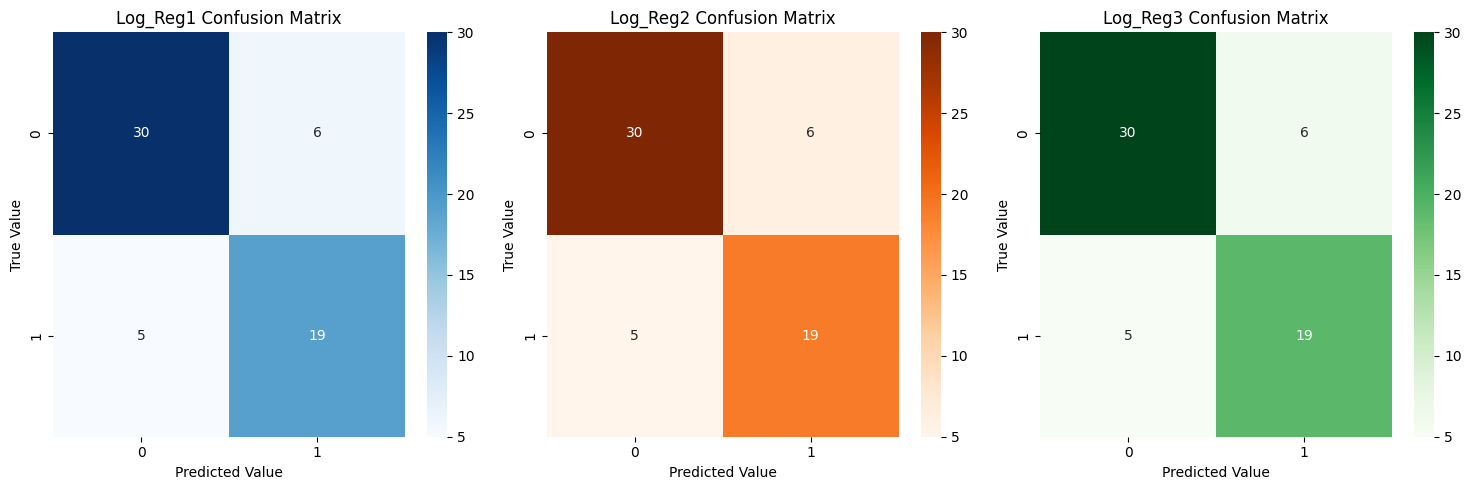

In [33]:
# Import confusion matrix and heatmap plotting libraries
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

# Generate predictions using the test data
predicted_output1 = Log_Reg1.predict(x_test_scaled)
predicted_output2 = Log_Reg2.predict(x_test_scaled)
predicted_output3 = Log_Reg3.predict(x_test_scaled)

# Calculate confusion matrices
cm1 = confusion_matrix(y_test, predicted_output1)
cm2 = confusion_matrix(y_test, predicted_output2)
cm3 = confusion_matrix(y_test, predicted_output3)

# Plot confusion matrices as heatmaps
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sn.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title('Log_Reg1 Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

plt.subplot(1, 3, 2)
sn.heatmap(cm2, annot=True, fmt='d', cmap='Oranges')
plt.title('Log_Reg2 Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

plt.subplot(1, 3, 3)
sn.heatmap(cm3, annot=True, fmt='d', cmap='Greens')
plt.title('Log_Reg3 Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

plt.tight_layout()
plt.show()
